In [9]:
#------libraries------
import numpy as np
import scipy as sp
import scipy.constants as sp_c
import bsw as bsw
import time as time
from numba import autojit
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

#------constants------
c=(10.0**9)*sp_c.speed_of_light
f_size=15;

mpl.rc('axes', linewidth=2)
mpl.rc('xtick.major',width=2.0);mpl.rc('ytick.major',width=2.0)
mpl.rc('mathtext', fontset='stixsans')
mpl.rc('mathtext', default='regular')
mpl.rc('lines', linewidth=2.0)

In [3]:
#------inputs------
N=4;
n2=2.051;n1=1.465;
n_inc=1.465;n_sub=1.33
b=170;a=495;
l_min=250;l_max=1000;l_0=600;
theta_min=np.pi/8;theta_max=np.pi/2.1;
beta_min=2.0*np.pi*np.sin(theta_min)/l_max;beta_max=2.0*np.pi*np.sin(theta_max)/l_min
omega_min=2.0*np.pi*c/l_max;omega_max=2.0*np.pi*c/l_min;
pol=0
n_points=100
v_omega=np.linspace(omega_min,omega_max,n_points);v_beta=np.linspace(beta_min,beta_max,n_points);
v_theta=np.linspace(theta_min,theta_max,n_points);v_l=np.linspace(l_min,l_max,n_points);
x,y=np.meshgrid(v_l,v_theta)

In [4]:
def map_AD(a,b,n1,n2,v_l,v_theta,pol):
    z=np.array([bsw.AD(a,b,n1,n2,bsw.f_omega(l),bsw.f_beta(n_inc,l,theta),pol) for l in v_l for theta in v_theta]).reshape(n_points,n_points)
    return z
map_AD_numba=autojit(map_AD)

In [7]:
z=map_AD(a,b,n1,n2,v_l,v_theta,pol)

In [6]:
z=map_AD_numba(a,b,n1,n2,v_l,v_theta,pol)

NotImplementedError: offset=83 opcode=0x5e opname=LIST_APPEND

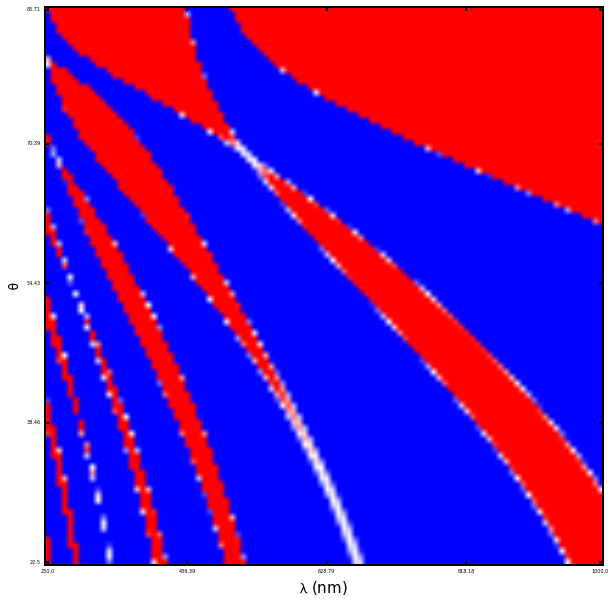

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(z.T, vmin=-0.01,vmax=0.01,origin='lower',cmap='bwr');

#------x axis formatting------
plt.xlabel(r'$\lambda$ (nm)',fontsize=f_size);
v_ticks=[0,25,50,75,99]    #---xticks---
plt.xticks( v_ticks, map(str,np.around(v_l[v_ticks],2)),fontsize=f_size-10 );

#------y axis formatting------
plt.ylabel(r'$\theta$',fontsize=f_size);
plt.yticks( v_ticks, map(str,np.round(180.*v_theta[v_ticks]/np.pi,2)),fontsize=f_size-10 );

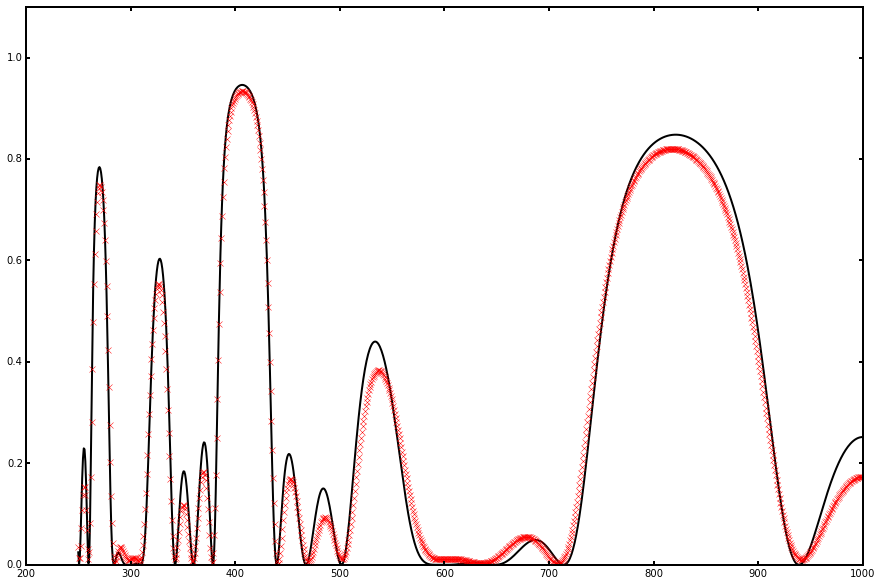

In [11]:
plt.figure(figsize=(15,10))
v_l_plot=np.linspace(l_min,l_max,n_points*10)
plt.plot(v_l_plot,[bsw.rN_sym(a,b,n1,n2,N,bsw.f_omega(l),bsw.f_beta(n_inc,l,np.pi/4.0),pol) for l in v_l_plot],'k',
         v_l_plot,[bsw.rN(a,b,n1,n2,n_inc,n_sub,N,bsw.f_omega(l),bsw.f_beta(n_inc,l,np.pi/4.0),pol) for l in v_l_plot],'rx',)
plt.ylim(0,1.1);

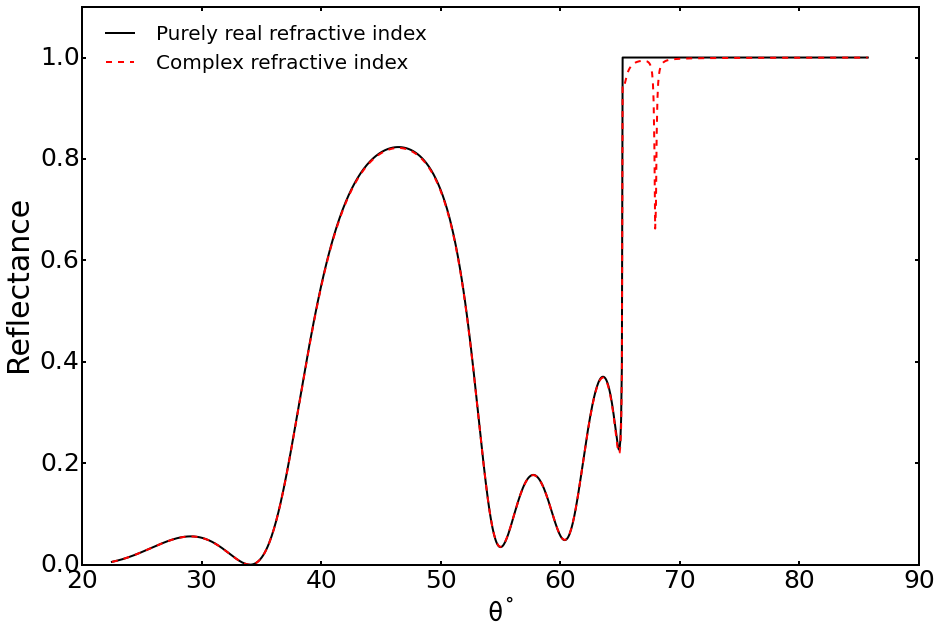

In [12]:
plt.figure(figsize=(15,10))
v_theta_plot=np.linspace(theta_min,theta_max,n_points*10)
l0=804
plt.plot(180*v_theta_plot/np.pi,[bsw.rN(a,b,n1,n2,n_inc,n_sub,N,bsw.f_omega(l0),bsw.f_beta(n_inc,l0,theta),pol) for theta in v_theta_plot],'k',
         180*v_theta_plot/np.pi,[bsw.rN(a,b,n1+1j*1e-4,n2+1j*1e-4,n_inc,n_sub,N,bsw.f_omega(l0),bsw.f_beta(n_inc,l0,theta),pol) for theta in v_theta_plot],'r--')
plt.ylim(0,1.1);

#-----ticks------
plt.xticks(fontsize=f_size+10);plt.yticks(fontsize=f_size+10);
#------axis labels------
plt.xlabel(r'$\theta^{\circ}$',fontsize=f_size+15);
plt.ylabel('Reflectance',fontsize=f_size+15);

#------plot legend------
plt.legend(('Purely real refractive index','Complex refractive index'), fontsize=f_size+5,loc='upper left',frameon=False);


In [4]:
prezzi=np.array([0.4,0.6,1.0,1.5])

In [9]:
prezzi_senzaiva=prezzi*0.96
prezzi_iva4=prezzi_senzaiva*1.04
prezzi_iva10=prezzi_senzaiva*1.1

In [17]:
print np.round(prezzi_iva4,2)
print np.round(prezzi_iva10,2)
print np.round(prezzi_iva10,2)-(prezzi +0.05)
print np.round(prezzi_iva10,2)-(prezzi +0.1)

[ 0.4  0.6  1.   1.5]
[ 0.42  0.63  1.06  1.58]
[-0.03 -0.02  0.01  0.03]
[-0.08 -0.07 -0.04 -0.02]
